In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

train, validation = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Hand gesture",
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    image_size=(128,128),
    seed=23,
    color_mode="grayscale",
    subset="both"
)


Found 1305 files belonging to 10 classes.
Using 1044 files for training.
Using 261 files for validation.


In [ ]:
import tensorflow as tf
for image_batch, label_batch in train.take(1):
    print(image_batch.shape)


(32, 128, 128, 1)


In [ ]:
import tensorflow as tf
for image_batch, label_batch in validation.take(1):
    print(image_batch.shape)

(32, 128, 128, 1)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train = train.map(lambda x, y: (normalization_layer(x), y))
validation = validation.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(True),
              metrics=['accuracy'])


In [ ]:
model.fit(train,
          epochs=3,
          validation_data=validation)

Epoch 1/3
33/33 [==============================] - 95s 3s/step - loss: 1.5684 - accuracy: 0.4990 - val_loss: 0.5936 - val_accuracy: 0.8506
Epoch 2/3
33/33 [==============================] - 35s 1s/step - loss: 0.2879 - accuracy: 0.9205 - val_loss: 0.1699 - val_accuracy: 0.9425
Epoch 3/3
33/33 [==============================] - 34s 1s/step - loss: 0.0780 - accuracy: 0.9780 - val_loss: 0.0400 - val_accuracy: 0.9885


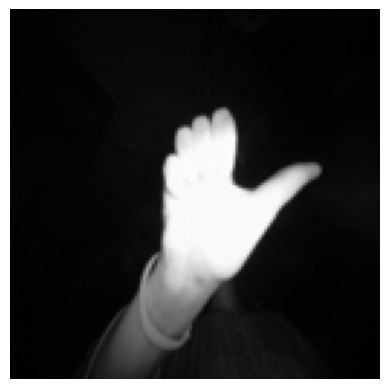

In [ ]:
from PIL import Image
import numpy as np
image_path = "/content/drive/MyDrive/Hand gesture/thumb-20240718T143838Z-001/thumb/frame_09_05_0004.png"
image = Image.open(image_path).convert("L")
image = image.resize((128, 128))
image_array = np.array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0
image_array = np.expand_dims(image_array, axis=-1)
import matplotlib.pyplot as plt
plt.imshow(image_array[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
predictions = model.predict(image_array)
print(predictions)

1/1 [==============================] - 0s 50ms/step
[[-0.95073134 -2.7607265   0.26500976 -2.0062754   6.888238    0.14588355
   4.1317673   0.1512514  -3.4076807  18.72596   ]]


In [ ]:
predicted_class_index = np.argmax(predictions, axis=1)[0]

In [ ]:
class_names = ['c', 'down', 'fist','fist_moved','index','I','ok','palm','palm moved','thumb']
predicted_class_name = class_names[predicted_class_index]

In [ ]:
predicted_class_name

'thumb'